## EXERCISE 4

We want to study the performances of an RBM, and, by looking at its learned weights and biases, better understand the correlations in the data (from file x_RBM_2024_exercise.dat, N=104 configurations with L=10 bits). Use an RBM with M=3 hidden units.

| Name | Surname | ID Number |
|------|---------|---------------------|
| Lucrezia | Rossi | 2122164 |
| Lorenzo | Calandra Buonaura | 2107761 |
| Andrea | Turci | 2106724 |

In [17]:
import numpy as np
from numpy import exp, sqrt, abs
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 13

from IPython.display import display_html 
import pandas as pd

In [18]:
dname = "DATA"; fname = dname + '/x_RBM_2024_exercise.dat'

v = np.loadtxt(fname, delimiter = " ", dtype = int)
N = len(v)
L = len(v[1])

#SPINS = True
SPINS = False

if SPINS:
    # sigmoid takes into account energy difference =2
    GAP=2
    # convert 0,1 -> -1,1
    v = 2*v - 1
    vmin=-1
else:
    GAP=1
    vmin=0

print(f'each of N={N} data has L={L} digits')

each of N=10000 data has L=10 digits


In [19]:
def is_one(cell_value):
    color0 = 'background-color: gray; color: white'
    color1 = 'background-color: white;'
    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return color1
    return color0

N1=12
df0 = pd.DataFrame(v[:N1])
df0s = df0.style.set_table_attributes("style='display:inline'")
df0s.map(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)

display_html(df0s._repr_html_(), raw=True)

,0,1,2,3,4,5,6,7,8,9
0,0,0,1,1,0,0,0,0,1,1
1,0,0,0,1,0,0,0,1,0,0
2,1,0,0,0,1,0,1,0,0,0
3,0,1,1,1,0,1,0,1,0,0
4,1,1,1,0,1,1,1,1,0,0
5,0,1,0,0,1,1,1,0,0,0
6,1,0,1,0,0,0,1,1,1,1
7,1,0,1,1,0,1,1,0,0,0
8,1,0,1,0,0,0,0,1,1,1
9,1,1,0,0,1,1,0,0,0,0


In [20]:
# RBM, nr of hidden units
M = 3
# range of each initial weight
sigma = sqrt(4. / float(L + M))
# random seed for reproducibility
np.random.seed(12345)
# initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
w = sigma * np.random.randn(L,M)
a = sigma * np.random.randn(L)
b = np.zeros(M)
print("w=",w);print("a=",a);print("b=",b)
w0,a0,b0=np.copy(w),np.copy(a),np.copy(b)

w= [[-1.13551379e-01  2.65669964e-01 -2.88132757e-01]
 [-3.08263709e-01  1.09041887e+00  7.72922489e-01]
 [ 5.15360175e-02  1.56284646e-01  4.26576969e-01]
 [ 6.91397593e-01  5.58688134e-01 -7.19014104e-01]
 [ 1.52537913e-01  1.26978019e-01  7.50463234e-01]
 [ 4.91702529e-01 -1.11030861e+00 -2.06261128e-01]
 [ 9.25808667e-01 -2.43274719e-01 -2.99394686e-01]
 [ 2.64583679e-01  1.80218983e+00 -5.66475108e-01]
 [-3.20110440e-01  6.88500960e-02  1.67859802e-01]
 [ 2.90536469e-01  5.21572266e-04  7.45411556e-01]]
a= [-0.39580299 -0.46104103 -1.31476796 -1.03216437 -0.4774623   0.3107127
 -0.70221411  0.06646813 -0.58993056  0.18465011]
b= [0. 0. 0.]


In [21]:
def activate(v_in,wei,bias,DE,info=False):
    act = np.dot(v_in, wei) + bias
    n = np.shape(act)
    prob = 1. / (1. + exp(-DE*act))
    v_out = np.full(n, vmin, dtype=int) # a list on -1's or 0's
    v_out[np.random.random_sample(n) < prob] = 1 # activate the 1's with probability prob
    if info:
        print('input=', v_in)
        print('act=',act)
        print('prob=',prob)
        print('output=',v_out)
    return v_out

k = 0
activate(v[k],w,b,GAP,info=True)

input= [0 0 1 1 0 0 0 0 1 1]
act= [0.71335964 0.78434445 0.62083422]
prob= [0.67114309 0.68661569 0.65040826]
output= [1 1 0]


array([1, 1, 0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1]


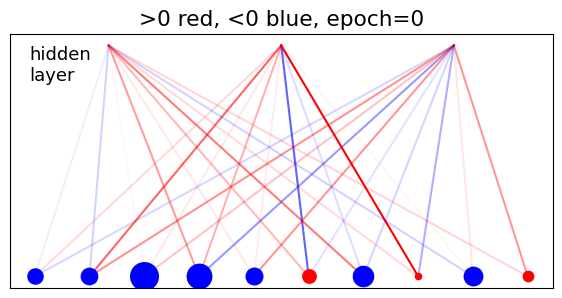

In [22]:
def create_coord(np,x0,f=1.0):
    x=[x0] * np
    print(x)
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(np-1.) - 0.5)
    return (x,y)
(x1,y1)=create_coord(L,0)
(x2,y2)=create_coord(M,1,f=0.7)

def mycolor(val):
    if val>0: return 'red'
    elif val<0: return 'blue'
    else: return 'black'
    
def plotgraph(epoch=0):
    fig, ax = plt.subplots(1,1 , figsize=(7, 3.3))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=300.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.51,0.85,"hidden\nlayer")
    plt.show()
    
plotgraph()

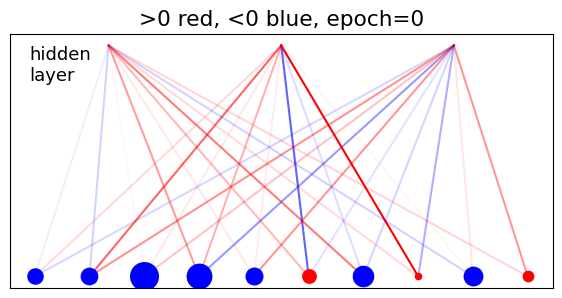

----------- epoch = 0   k= 499   m= 500
dw = [[ 0.112  0.06   0.036]
 [-0.052 -0.16  -0.074]
 [ 0.2    0.148  0.062]
 [ 0.082  0.056  0.03 ]
 [ 0.016 -0.064 -0.03 ]
 [ 0.118  0.014  0.006]
 [ 0.084 -0.008 -0.016]
 [-0.126 -0.258 -0.224]
 [ 0.12   0.084  0.074]
 [-0.094 -0.18  -0.098]]
da = [ 0.104 -0.132  0.216  0.09  -0.024  0.08   0.048 -0.264  0.136 -0.18 ]
db = [ 0.092 -0.084 -0.054]
----------- epoch = 1   k= 499   m= 500
dw = [[-0.03762376 -0.05742574 -0.0019802 ]
 [-0.02574257 -0.04158416  0.01980198]
 [ 0.01980198  0.02772277 -0.03960396]
 [-0.00990099 -0.05346535 -0.01584158]
 [ 0.0039604   0.01782178  0.04554455]
 [ 0.         -0.04554455 -0.01782178]
 [-0.04356436 -0.06534653 -0.07128713]
 [-0.0019802  -0.02178218 -0.01782178]
 [-0.11683168 -0.05742574 -0.02970297]
 [-0.07128713 -0.0039604  -0.01386139]]
da = [-0.00990099  0.0039604   0.03960396 -0.01584158  0.04554455 -0.00594059
 -0.05148515 -0.00792079 -0.09306931 -0.02376238]
db = [-0.04158416 -0.03168317 -0.02178218]


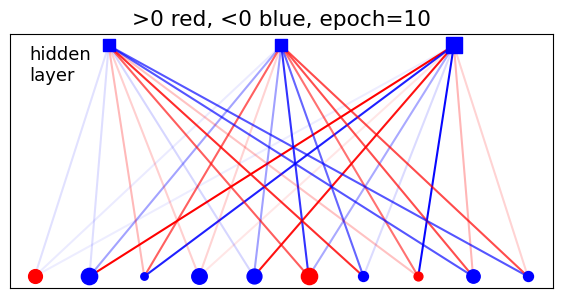

l_rate =  0.9090909090909092


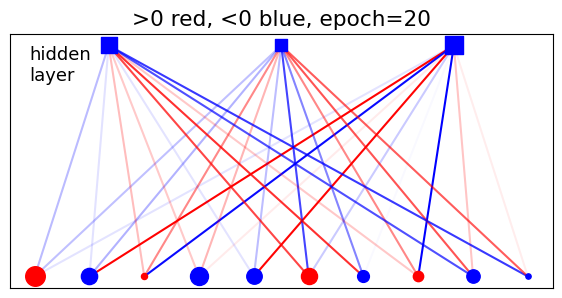

l_rate =  0.8333333333333337


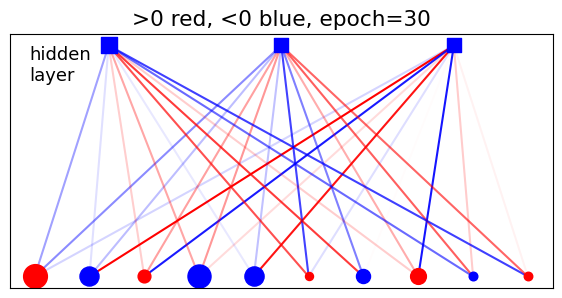

l_rate =  0.7692307692307697


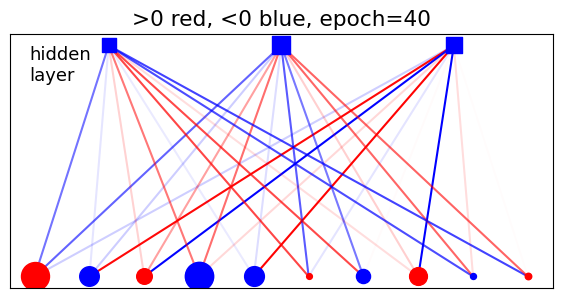

l_rate =  0.7142857142857149


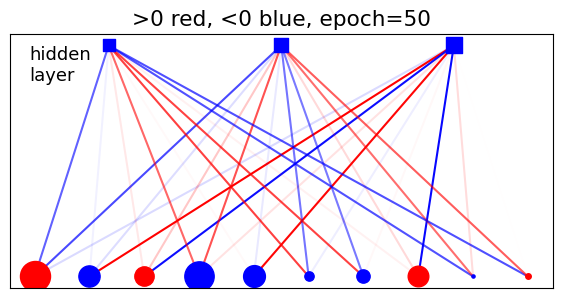

l_rate =  0.6666666666666671


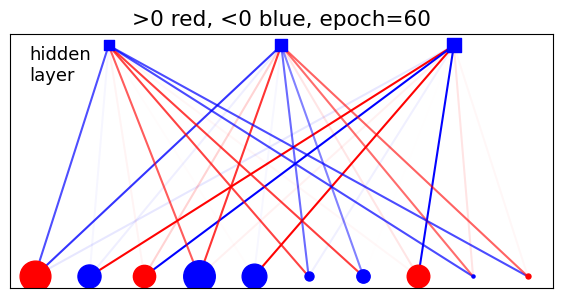

l_rate =  0.6250000000000006


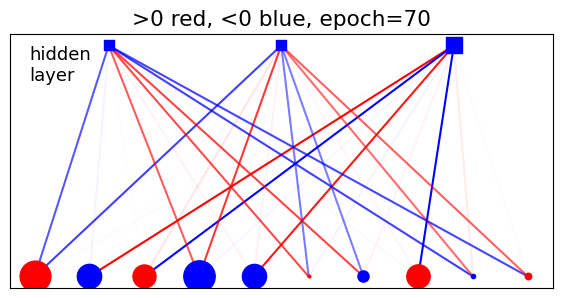

l_rate =  0.5882352941176475


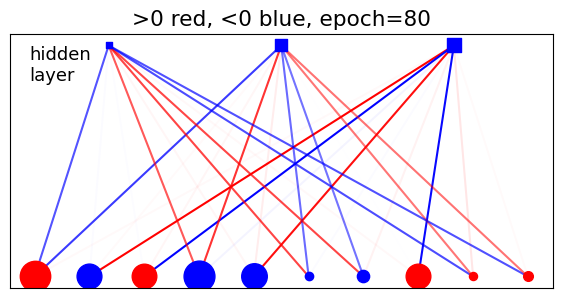

l_rate =  0.555555555555556


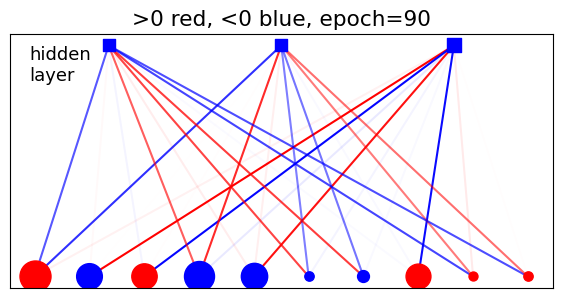

l_rate =  0.5263157894736847


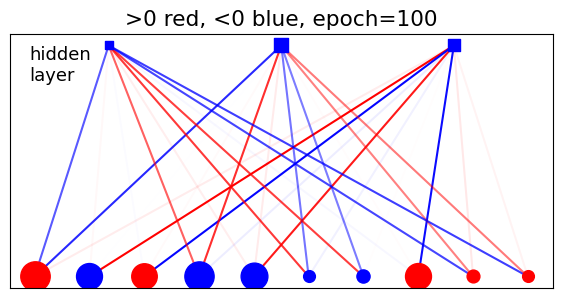

l_rate =  0.5000000000000009


In [23]:
# random seed for reproducibility
np.random.seed(12345)

plotgraph(0)

# learning rate
l_rate = 1.0

# minibatch
mini, m = 500, 0

# number of CD steps
n_steps = 5

# train model
print('===================================================')
for epoch in range(100):
    # aggregate normalization of batch statistics and learning rate in l_rate_m
    l_rate_m = l_rate / mini
    for k in range(N):
        if m==0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L),np.zeros(L)
            h_data, h_model = np.zeros(M),np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))

        # positive CD phase: generating h 
        h = activate(v[k],w,b,GAP)
        i = 0
        hf = h
        while i < n_steps:
            # negative CD phase: generating fantasy vf
            vf = activate(hf,w.T,a,GAP)
            # one more positive CD phase: generating fantasy h from fantasy vf 
            hf = activate(vf,w,b,GAP)
            i += 1

        v_data  += v[k]
        v_model += vf
        h_data  += h
        h_model += hf
        vh_data += np.outer(v[k].T,h)
        vh_model+= np.outer(vf.T,hf)
    
        m += 1
        # minibatch
        if m==mini:
            # gradient of the likelihood: follow it along its positive direction
            # with a "vanilla" SGD
            dw = l_rate_m*(vh_data - vh_model)
            da = l_rate_m*(v_data - v_model)
            db = l_rate_m*(h_data - h_model)
            if epoch<=1 and k<=mini:
                print('----------- epoch =',epoch,'  k=',k,'  m=',m)
                print('dw =',dw)
                print('da =',da)
                print('db =',db)
            # basic step of vanilla gradient descent, from eq.(211)
            w = w + dw
            a = a + da
            b = b + db
            m=0
    
    # randomize the order of input data
    np.random.shuffle(v)
    # decrease the learning rate (here as a power law)
    l_rate = l_rate / (0.01 * l_rate + 1)
    if epoch%10==9:
        plotgraph(epoch+1)
        print('l_rate = ',l_rate)

In [24]:
import itertools as it

def energy(v,h,w,a,b):
    energy= -np.dot(v, a) - np.dot(h, b) - np.sum(np.dot(v, w) * h)
    return energy

def log_likelihood(data, w, a, b):
    # Generate all possible configurations of visible units
    possible_configs_v = list(it.product([0, 1], repeat=L))
    possible_configs_h = list(it.product([0, 1], repeat=M))
    
    energies = [energy(v,h, w, a, b) for h in possible_configs_h for v in data]
    
    # Compute energy for each configuration
    energies = np.mean(energies * np.exp(-np.array(energies)))
    
    # Compute the partition function
    partition_func = np.sum([np.exp(-energy(v,h, w, a, b)) for h in possible_configs_h for v in possible_configs_v])

    # Compute log-likelihood
    log_like = -energies-np.log(partition_func)
    
    return log_like

In [26]:
# Initialize a list to store log-likelihood values
log_likelihoods = []

# Train model
print('===================================================')
for epoch in range(200):
    # aggregate normalization of batch statistics and learning rate in l_rate_m
    l_rate_m = l_rate / mini
    for k in range(N):  # Iterate over each data point
        if m == 0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L), np.zeros(L)
            h_data, h_model = np.zeros(M), np.zeros(M)
            vh_data, vh_model = np.zeros((L, M)), np.zeros((L, M))
        
        h = activate(v[k],w,b,GAP)
        i = 0
        hf = h
        while i < 5:
            # negative CD phase: generating fantasy vf
            vf = activate(hf,w.T,a,GAP)
            # one more positive CD phase: generating fantasy h from fantasy vf 
            hf = activate(vf,w,b,GAP)
            i += 1
        
        v_data += v[k]
        v_model += vf
        h_data += h
        h_model += hf
        vh_data += np.outer(v[k].T, h)
        vh_model += np.outer(vf.T, hf)
    
        m += 1
        # minibatch
        if m == mini:
            # gradient of the likelihood: follow it along its positive direction
            # with a "vanilla" SGD
            dw = l_rate_m * (vh_data - vh_model)
            da = l_rate_m * (v_data - v_model)
            db = l_rate_m * (h_data - h_model)
            if epoch <= 1 and k <= mini:
                print('----------- epoch =', epoch, '  t=', k, '  m=', m)
                print('dw =', dw)
                print('da =', da)
                print('db =', db)
            # basic step of vanilla gradient descent, from eq.(211)
            w = w + dw
            a = a + da
            b = b + db
            m = 0
            
    
    # randomize the order of input data
    #np.random.shuffle(v)
    # decrease the learning rate (here as a power law)
    l_rate = l_rate / (0.01 * l_rate + 1)
    # Compute log-likelihood and store it
    ll = log_likelihood(v, w, a, b)
    log_likelihoods.append(ll)
    print('Epoch:', epoch, 'Log Likelihood:', ll)


----------- epoch = 0   t= 499   m= 500
dw = [[ 0.01403509  0.00912281  0.01824561]
 [-0.00210526  0.00421053  0.01473684]
 [-0.01403509 -0.02877193 -0.0154386 ]
 [ 0.00140351 -0.0077193   0.00701754]
 [ 0.00350877  0.00280702  0.00701754]
 [ 0.01122807  0.         -0.00210526]
 [ 0.00912281  0.00070175  0.00421053]
 [ 0.00421053 -0.01824561 -0.01403509]
 [-0.00280702 -0.01263158  0.01052632]
 [-0.01122807 -0.01894737  0.00491228]]
da = [ 0.03508772  0.00140351 -0.03157895 -0.01122807  0.00701754  0.01684211
  0.00561404 -0.00842105 -0.01052632 -0.02596491]
db = [ 0.00210526 -0.00842105  0.01052632]
----------- epoch = 1   t= 499   m= 500
dw = [[-0.01188811  0.0041958   0.0034965 ]
 [-0.0048951   0.0013986   0.0027972 ]
 [-0.00699301 -0.01748252 -0.00559441]
 [-0.00559441 -0.0006993  -0.00909091]
 [-0.00629371  0.00699301 -0.0013986 ]
 [-0.0013986   0.00699301 -0.0013986 ]
 [-0.0048951   0.01328671 -0.0013986 ]
 [-0.01748252  0.0034965  -0.00839161]
 [-0.0034965  -0.0034965   0.0020979

KeyboardInterrupt: 

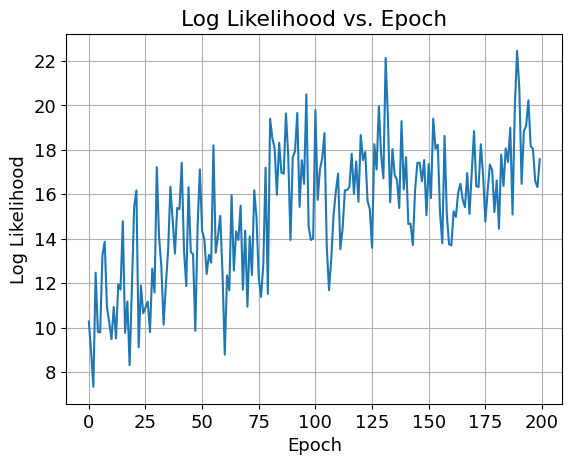

In [ ]:
# Plot log likelihood vs. epoch
plt.plot(range(len(log_likelihoods)), log_likelihoods)
plt.xlabel('Epoch')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood vs. Epoch')
plt.grid(True)
plt.show()

In [30]:
class RBM:
    def __init__(self, L, M, GAP=1.0):
        self.L = L  # Number of visible units
        self.M = M  # Number of hidden units
        self.GAP = GAP  # Parameter for activation function
        self.sigma = np.sqrt(4. / float(L + M))  # Range of initial weight

    def _initialize_weights(self):
        np.random.seed(12345)
        self.w = self.sigma * np.random.randn(self.L, self.M)
        self.a = self.sigma * np.random.randn(self.L)
        self.b = np.zeros(self.M)
        
        self.w0 = np.copy(self.w)
        self.a0 = np.copy(self.a)
        self.b0 = np.copy(self.b)
        
        print("w =", self.w)
        print("a =", self.a)
        print("b =", self.b)

    def _activate(self, v_in, wei, bias, DeltaE, info=False):
        
        act = np.dot(v_in, wei) + bias
        n = np.shape(act)
        prob = 1. / (1. + exp(-DeltaE*act))
        v_out = np.full(n, vmin, dtype=int) # a list on -1's or 0's
        v_out[np.random.random_sample(n) < prob] = 1 # activate the 1's with probability prob
        if info:
            print('input=', v_in)
            print('act=',act)
            print('prob=',prob)
            print('output=',v_out)
        return v_out

    def compute_cd_steps(self, cd_steps, h_i):
        hf=h_i  #set for the sake of the loop
        for i in range(cd_steps):
            # negative CD phase: generating fantasy vf
            vf = self._activate(hf,self.w.T,self.a,self.GAP)
            # one more positive CD phase: generating fantasy h from fantasy vf 
            hf = self._activate(vf,self.w,self.b,self.GAP)
        return vf,hf
    
    def train(self, v_in, l_rate=1.0, minibatch_size=500, n_epochs=100, n_steps=5):
        N = len(v_in)
        np.random.seed(12345)
        np.random.shuffle(v_in)
        self.m = 0
        for epoch in range(n_epochs):
            l_rate_epoch = l_rate / minibatch_size
            for k in range(N):
                if self.m == 0:
                    self._initialize_minibatch()

                h = self._activate(v[k], self.w, self.b, GAP)
                
                vf, hf = self.compute_cd_steps(n_steps, h)

                self.v_data += v[k]
                self.v_model += vf
                self.h_data += h
                self.h_model += vf

                self.vh_data += np.outer(v[k].T, h)
                self.vh_model += np.outer(vf.T, vf)

                self.m += 1

                if self.m == minibatch_size:
                    dw = l_rate_epoch * (self.vh_data - self.vh_model)
                    da = l_rate_epoch * (self.v_data - self.v_model)
                    db = l_rate_epoch * (self.h_data - self.h_model)

                    if epoch<=1 and k<=mini:
                        print('----------- epoch =',epoch,'  k=',k,'  m=',m)
                        print('dw =',dw)
                        print('da =',da)
                        print('db =',db)
                    
                    self.w += dw
                    self.a += da
                    self.b += db
                    
                    m = 0
                    
            np.random.shuffle(v)
            l_rate = l_rate / (0.01 * l_rate + 1)


    def _initialize_minibatch(self):
        self.v_data = np.zeros(self.L)
        self.v_model = np.zeros(self.L)
        self.h_data = np.zeros(self.M)
        self.h_model = np.zeros(self.M)
        self.vh_data = np.zeros((self.L, self.M))
        self.vh_model = np.zeros((self.L, self.M))

    def plot_graph(self, epoch=0):
        fig, ax = plt.subplots(1, 1, figsize=(7, 3.3))
        ax.tick_params(left=False, bottom=False)
        ax.xaxis.set_major_formatter(plt.NullFormatter())
        ax.yaxis.set_major_formatter(plt.NullFormatter())

        x1 = [0] * self.L
        y1 = list(range(self.L))
        for i in range(self.L):
            y1[i] = 1 * (y1[i] / (self.L - 1.) - 0.5)
            
        x2 = [1] * self.L
        y2 = list(range(self.L))
        for i in range(self.L):
            y2[i] = 0.7 * (y2[i] / (self.L - 1.) - 0.5)
            
        A = 1. / max(self.w.max(), -self.w.min())
        for i in range(self.L):
            for j in range(self.M):
                ex, ey, col = (y1[i], y2[j]), (x1[i], x2[j]), self._my_color(self.w[i][j])
                ax.plot(ex, ey, col, zorder=1, alpha=A * abs(self.w[i][j]))

        A = 300.
        for i in range(self.L):
            ax.scatter(y1[i], x1[i], s=A * abs(self.a[i]), zorder=2, c=self._my_color(self.a[i]))

        for j in range(self.M):
            ax.scatter(y2[j], x2[j], s=min(300, A * abs(self.b[j])), zorder=2, c=self._my_color(self.b[j]),
                       marker="s")
        ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
        ax.text(-0.51, 0.85, "hidden\nlayer")
        plt.show()

    @staticmethod
    def _my_color(val):
        if val > 0:
            return 'red'
        elif val < 0:
            return 'blue'
        else:
            return 'black'

w = [[-1.13551379e-01  2.65669964e-01 -2.88132757e-01]
 [-3.08263709e-01  1.09041887e+00  7.72922489e-01]
 [ 5.15360175e-02  1.56284646e-01  4.26576969e-01]
 [ 6.91397593e-01  5.58688134e-01 -7.19014104e-01]
 [ 1.52537913e-01  1.26978019e-01  7.50463234e-01]
 [ 4.91702529e-01 -1.11030861e+00 -2.06261128e-01]
 [ 9.25808667e-01 -2.43274719e-01 -2.99394686e-01]
 [ 2.64583679e-01  1.80218983e+00 -5.66475108e-01]
 [-3.20110440e-01  6.88500960e-02  1.67859802e-01]
 [ 2.90536469e-01  5.21572266e-04  7.45411556e-01]]
a = [-0.39580299 -0.46104103 -1.31476796 -1.03216437 -0.4774623   0.3107127
 -0.70221411  0.06646813 -0.58993056  0.18465011]
b = [0. 0. 0.]


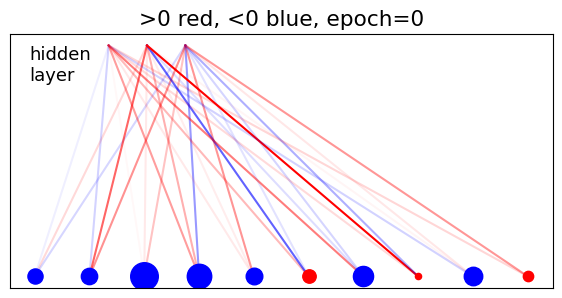

ValueError: operands could not be broadcast together with shapes (3,) (10,) (3,) 

In [31]:
# Create RBM instance
rbm = RBM(L, M, GAP)

# Plot graph
rbm._initialize_weights()  # Initialize weights
rbm.plot_graph()

# Example usage: train RBM
rbm.train(v)

# Plot graph after training
rbm.plot_graph()
